In [1]:
# Importação das Bibliotecas 
import pandas as pd
import seaborn as sns
import random
import collections
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Importação dos dados a serem utilizados para a criação do modelo de ML
# skiprows = 0.01 = 1% of the lines
#nrows= 15_000_000)
data_origin = pd.read_csv(r'D:\Mestrado\MasterMedicalDecisionSupport\Arquivos_Tot\Arq Antigos\reformatted_7b.csv', 
                          encoding='latin-1',skiprows=lambda i: i>0 and random.random() > 0.80
                         )

# ADICIONANDO CABEÇALHO AO ARQUIVO
data_origin.columns=['patients', 'neuro_1', 'cardi_1', 'respi_1', 'coagu_1', 'hepat_1', 'renal_1', 'icc_1', 'ecog_1', 'SOFA_total_1', 'amib_total_1',
                          'neuro_2', 'cardi_2', 'respi_2', 'coagu_2', 'hepat_2', 'renal_2', 'icc_2', 'ecog_2', 'SOFA_total_2', 'amib_total_2','decisao'
                    ]
#Removendo a coluna patients
data = data_origin.drop('patients', axis=1)

#TRANSFORMANDO O DATASET PARA MELHOR TRABALHAR
data = data.astype('int16')

data

#Se tiver um bom resultado, pode ser exportado essa base de dados.
#data_origin.to_csv("D:\Mestrado\MasterMedicalDecisionSupport\Arquivos_Tot\Dataset_Trained_26-02.csv")

,neuro_1,cardi_1,respi_1,coagu_1,hepat_1,renal_1,icc_1,ecog_1,SOFA_total_1,amib_total_1,...,cardi_2,respi_2,coagu_2,hepat_2,renal_2,icc_2,ecog_2,SOFA_total_2,amib_total_2,decisao
0,-2,8,2,3,-2,3,-2,0,0,4,...,6,0,0,0,0,-4,96,-2,3,1
1,-1,6,1,6,-2,3,-1,0,2,0,...,9,0,0,0,0,-1,72,-1,2,1
2,2,0,2,3,0,1,-2,0,2,0,...,9,-3,0,0,0,4,32,-3,4,1
3,2,0,3,0,0,1,-3,0,0,4,...,6,-3,0,0,0,2,48,-3,4,1
4,2,0,2,3,0,1,-1,0,-1,6,...,0,-3,0,0,0,2,48,-3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63685,0,0,0,0,1,0,-3,0,-2,0,...,12,0,9,0,0,-4,5,0,16,2
63686,-3,0,-4,0,-3,4,-3,0,0,0,...,8,3,0,0,0,-13,14,1,12,2
63687,-2,0,-4,0,-1,2,-3,0,-3,0,...,16,3,0,0,0,-13,14,1,12,2
63688,-4,0,-4,0,-3,4,-1,0,-2,0,...,8,0,9,0,0,-14,15,-3,28,2


Tamanho do conjunto de dados =  63690
Contagem de ocorrências de cada valor da coluna:
 2    31125
1    31008
0     1557
Name: decisao, dtype: int64


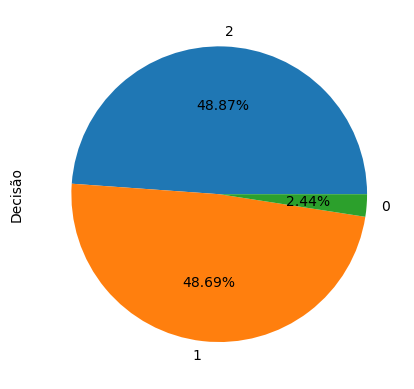

In [4]:
# Quantidade de registros no dataset com cada decisão do AMIB/ABRAMED
print("Tamanho do conjunto de dados = ", len(data.index))

print("Contagem de ocorrências de cada valor da coluna:\n", data['decisao'].value_counts())

# GRAFICO PARA MOSTRAR A DIVISÃO DOS REGISTROS.
%matplotlib inline
import matplotlib.pyplot as plt

data['decisao'].value_counts().plot(kind='pie', autopct='%0.2f%%', label = 'Decisão');
plt.savefig('Mestrado_diff_prod-dist-1.png', format='png')

In [ ]:
data.boxplot()

<Figure size 1920x1440 with 0 Axes>

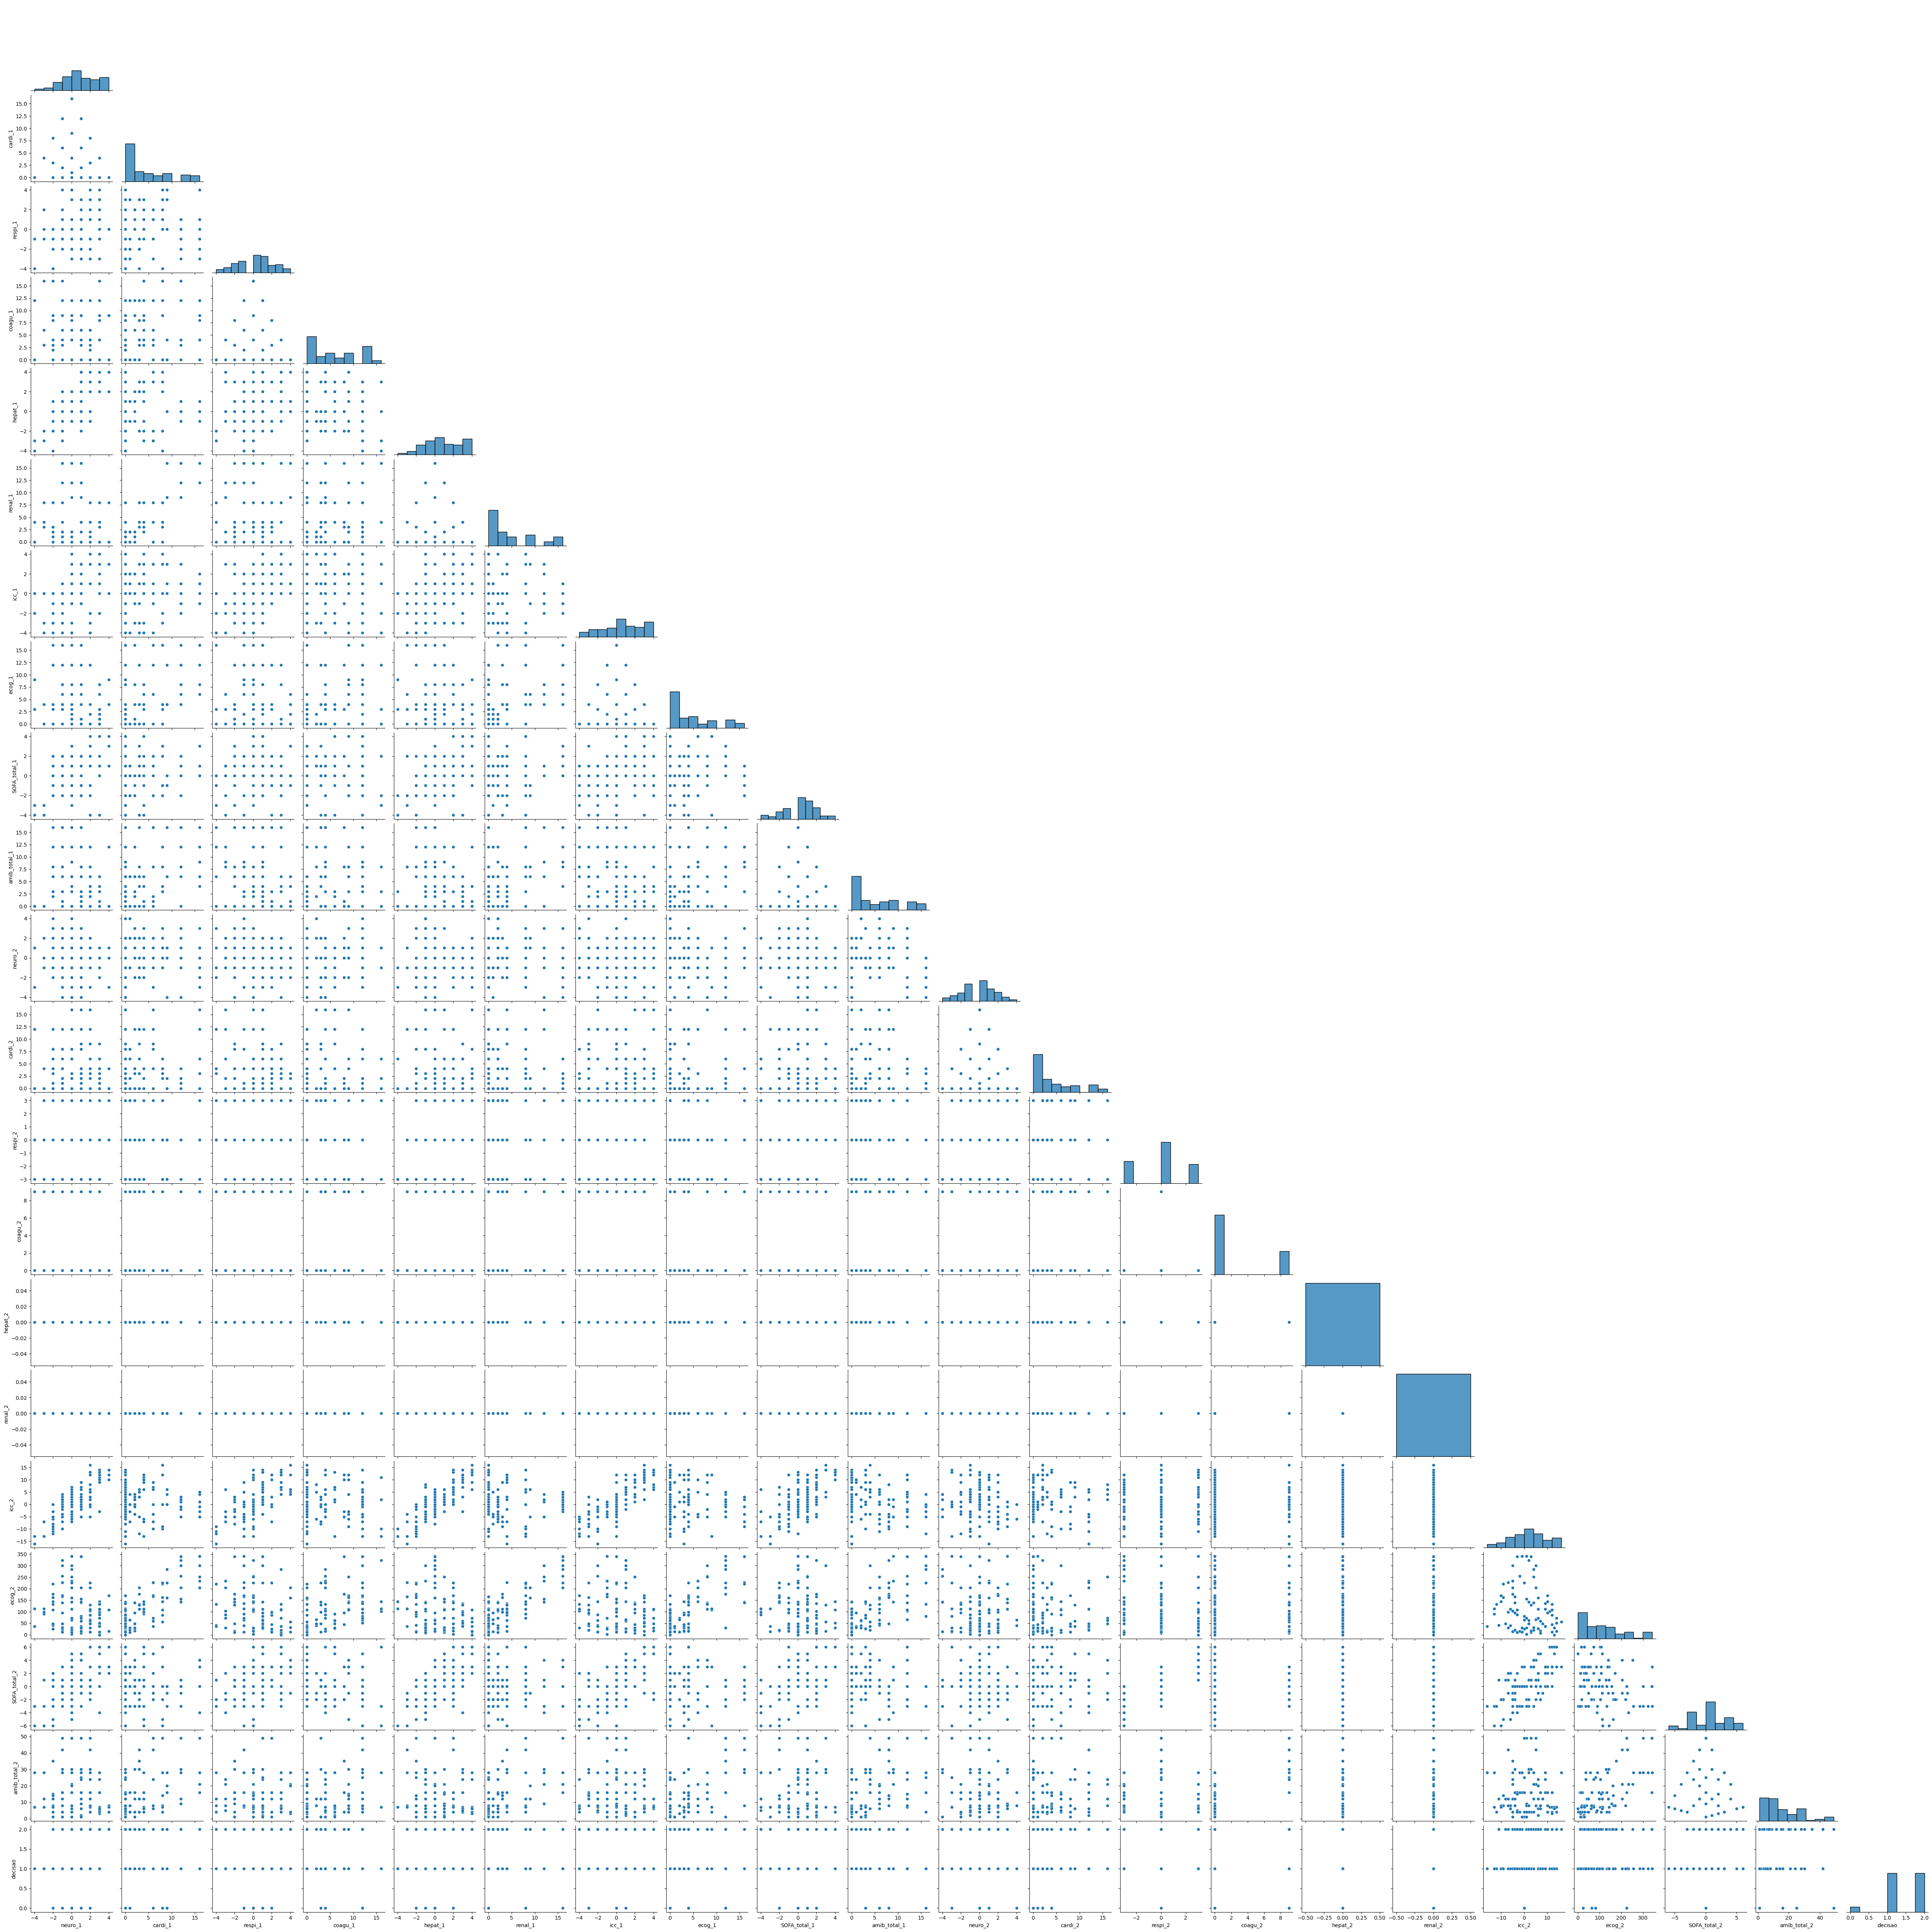

In [5]:
#Mostra informações gerais dos dados
plt.figure(dpi=300)
sns.pairplot(data.sample(n=100), corner=True)

In [ ]:
'''import seaborn as sns
import matplotlib.pyplot as plt

# Criando o ambiente do gráfico 
sns.set_style("white")
plt.figure(figsize=(10, 10))

# Gráfico de Dispersão
g = sns.scatterplot(x="decisao", y="patients", 
                    data=data_origin.sample(n=100))
plt.show()
'''

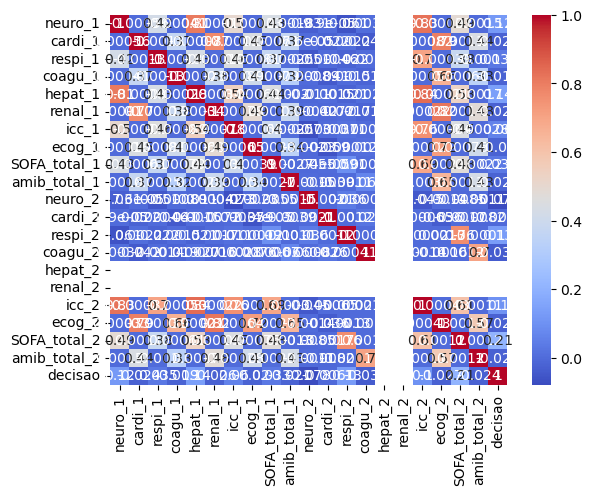

In [6]:
# Visualiza a Correlação
correlation_matrix = data.corr()
# Plotar o mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.savefig('segundo_teste_Correlacao.png')

In [ ]:
### 3° Pré-Processamento dos dados

# Convertendo variáveis string em numéricas com o "LabelEncoder"


#for variaveis in ['neuro_1', 'cardi_1', 'respi_1', 'coagu_1', 'hepat_1', 'renal_1', 'icc_1', 'ecog_1', 'SOFA_total_1', 'amib_total_1','neuro_2', 'cardi_2', 'respi_2', 'coagu_2', 'hepat_2', 'renal_2', 'icc_2', 'ecog_2', 'SOFA_total_2', 'amib_total_2']:
    #data[variaveis] = LabelEncoder().fit_transform(data[variaveis])

#data.head()

In [7]:
# Selecionando as variáveis a serem utilizadas na Previsão e colocando em 'X'
# somente removendo as que não fazem parte do grupo
X = data.drop("decisao", axis=1)
# Colocando a variável target (label, variavel a ser predita....) no objeto 'Y'
Y = data['decisao'].values.tolist()

In [8]:
# Dividindo os dados em Treino e Teste (30% para teste)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

print('O dataset de treino possui {} registros e o de teste {} registros.'
       .format(X_train.shape[0], X_test.shape[0]))

O dataset de treino possui 44583 registros e o de teste 19107 registros.


In [9]:
# Criando a Máquina Preditiva - Instanciando o Algoritmo de ML (Chamando o algoritmo a ser usado)
clf_RF = RandomForestClassifier(n_estimators=100, random_state=42)

In [10]:
# Treinando o Algoritmo com os dados de treino
clf_RF = clf_RF.fit(X_train, Y_train)

In [11]:
#pd.to_pickle(clf_RF, r'D:\Mestrado\MasterMedicalDecisionSupport\Arquivos_Tot\Model_MDS.pickle')

In [12]:
#Modelo = pd.read_pickle(r'D:\Mestrado\MasterMedicalDecisionSupport\Arquivos_Tot\Model_MDS.pickle')

In [13]:
# Importância das Variáveis
#features = data.columns.difference(['decisao'])
features = data
features_importance = zip(clf_RF.feature_importances_, data)
for importance, feature in sorted(features_importance, reverse=True):
    print("%s: %f%%" % (feature, importance*100))

ecog_2: 21.219764%
icc_2: 17.475465%
SOFA_total_2: 6.105678%
amib_total_2: 5.309722%
respi_1: 4.868369%
ecog_1: 4.822239%
coagu_1: 4.655567%
amib_total_1: 4.087354%
SOFA_total_1: 4.018945%
icc_1: 3.884427%
neuro_1: 3.713224%
hepat_1: 3.465211%
cardi_1: 3.335236%
neuro_2: 3.263017%
renal_1: 3.242278%
cardi_2: 3.191837%
respi_2: 2.112602%
coagu_2: 1.229064%
renal_2: 0.000000%
hepat_2: 0.000000%


In [ ]:
# 5° Avaliando a Acurácia do Modelo de Machine Learning

# Validando a Maquina Preditiva - Verificando o nível de Acurácia da Máquina Preditiva
accuracy = clf_RF.score(X_test, Y_test)
print('Accuracy: ' + str(accuracy))


In [14]:
# CRIANDO AS MÉTRICAS COM A SELEÇÃO DE DADOS QUE O RANDOM FOREST SEPAROU.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

y_pred = clf_RF.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
f1 = f1_score(Y_test, y_pred, average='macro')
auc_roc = roc_auc_score(Y_test, clf_RF.predict_proba(X_test), multi_class='ovr')
cm = confusion_matrix(Y_test, y_pred)

print(f'Acurácia-RF: {accuracy:.2f}')
print(f'Precisão-RF: {precision:.2f}')
print(f'Recall-RF: {recall:.2f}')
print(f'F1-Score-RF: {f1:.2f}')
print(f'AUC-ROC-RF: {auc_roc:.2f}')
print(f'Matriz de Confusão-RF:\n{cm}')

Acurácia-RF: 0.95
Precisão-RF: 0.96
Recall-RF: 0.96
F1-Score-RF: 0.96
AUC-ROC-RF: 0.99
Matriz de Confusão-RF:
[[ 497    0    0]
 [   0 8813  488]
 [   0  492 8817]]


In [ ]:
#TESTANDO COM DADOS DE OUTRO ARQUIVO.

In [16]:
## Importação de outro arquivo.
Data_validation = pd.read_csv(r'D:\Mestrado\MasterMedicalDecisionSupport\Arquivos_Tot\Arq Antigos\reformatted_7b1.csv',
                              encoding='latin-1'
                             )

# ADICIONANDO CABEÇALHO AO ARQUIVO
Data_validation.columns=['patients', 'neuro_1', 'cardi_1', 'respi_1', 'coagu_1', 'hepat_1', 'renal_1', 'icc_1', 'ecog_1', 'SOFA_total_1', 'amib_total_1',
                          'neuro_2', 'cardi_2', 'respi_2', 'coagu_2', 'hepat_2', 'renal_2', 'icc_2', 'ecog_2', 'SOFA_total_2', 'amib_total_2','decisao']

# Colocando a variável target em 'Y' para comparação
Y_validation = Data_validation['decisao'].values.tolist()

#Removendo a coluna patients e decisao
Data_prepared = Data_validation.drop(['patients','decisao'], axis=1)


In [17]:
New_Predictions = clf_RF.predict(Data_prepared)

count = 0
diff = []

for i in range(len(Y_validation)):
    if Y_validation[i] != New_Predictions[i]:
        count += 1
        diff.append((i, Y_validation[i], New_Predictions[i]))
#       err_grave = Data_prepared[i]
        
#print(err_grave)
print("Número de elementos diferentes: ", count)
print("Porcentagem de diferença: ", (count/len(Y_validation))*100, "%")

c = collections.Counter((d[1], d[2]) for d in diff)

print('porcentagem erro grave', sum((c[(2,1)], c[(1,2)]))/len(Y_validation)*100, '%')
print('porcentagem decisão', sum((c[0, 1], c[0,2]))/len(Y_validation)*100, '%')

print(c)


Número de elementos diferentes:  884
Porcentagem de diferença:  12.530120481927712 %
porcentagem erro grave 12.530120481927712 %
porcentagem decisão 0.0 %
Counter({(2, 1): 453, (1, 2): 431})


In [18]:
result_data = []

for i in range(100): # ou range(len(diff))
    result_data.append(list(Data_prepared.iloc[diff[i][0]]) + [diff[i][1]] + [diff[i][2]])
    
result_data = set(map(tuple, result_data)) # converter em conjunto, remover duplicatas, e converter de volta para lista

result_df = pd.DataFrame(result_data, columns=list(Data_prepared.columns) + ['previsão_arquivo'] + ['previsão_IA'])

# Exportar para CSV
result_df.to_csv('Exportação.csv')

print(result_df)


    neuro_1  cardi_1  respi_1  coagu_1  hepat_1  renal_1  icc_1  ecog_1  \
0        -1        0        0        0        1        0     -1       0   
1         0       16        3        4        0       16     -3       4   
2        -1       12        3        4        1       12      4       0   
3         3        0       -3        0        1        6     -3       0   
4         2        3        1        2        3        4      3       0   
..      ...      ...      ...      ...      ...      ...    ...     ...   
95       -1        0        0        0        0        1     -3       0   
96        3        0        1       12        4        0      3       4   
97        2        3        4        0        4        0      4       0   
98        0        9        0       16        0       16      1      12   
99       -1        2       -1        2       -1        2     -2       8   

    SOFA_total_1  amib_total_1  ...  respi_2  coagu_2  hepat_2  renal_2  \
0              0        

Tamanho do conjunto de dados =  7055
Contagem de ocorrências de cada valor da coluna:
 1    3444
2    3444
0     167
Name: decisao, dtype: int64


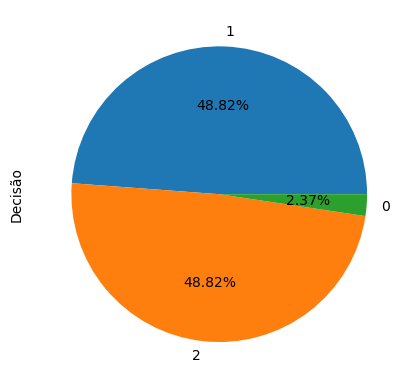

In [19]:
# Quantidade de registros no dataset com cada decisão do AMIB/ABRAMED
print("Tamanho do conjunto de dados = ", len(Data_validation.index))

print("Contagem de ocorrências de cada valor da coluna:\n", Data_validation['decisao'].value_counts())

# GRAFICO PARA MOSTRAR A DIVISÃO DOS REGISTROS.
%matplotlib inline
import matplotlib.pyplot as plt

Data_validation['decisao'].value_counts().plot(kind='pie', autopct='%0.2f%%', label = 'Decisão');
plt.savefig('segundo_teste.png', format='png')

In [20]:
# IMPORTTANCIA DAS VARIAVEIS PARA O DATASET DE CIMA
features = Data_validation
features_importance = zip(clf_RF.feature_importances_, Data_validation)
for importance, feature in sorted(features_importance, reverse=True):
    print("%s: %f%%" % (feature, importance*100))

icc_2: 21.219764%
renal_2: 17.475465%
ecog_2: 6.105678%
SOFA_total_2: 5.309722%
cardi_1: 4.868369%
icc_1: 4.822239%
respi_1: 4.655567%
SOFA_total_1: 4.087354%
ecog_1: 4.018945%
renal_1: 3.884427%
patients: 3.713224%
coagu_1: 3.465211%
neuro_1: 3.335236%
amib_total_1: 3.263017%
hepat_1: 3.242278%
neuro_2: 3.191837%
cardi_2: 2.112602%
respi_2: 1.229064%
hepat_2: 0.000000%
coagu_2: 0.000000%


In [24]:
# CRIANDO AS MÉTRICAS COM A SELEÇÃO DE DADOS IMPORTADAS DO ARQUIVO.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

y_pred = clf_RF.predict(Data_prepared)

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
f1 = f1_score(Y_test, y_pred, average='macro')
auc_roc = roc_auc_score(Y_test, clf_RF.predict_proba(Data_prepared), multi_class='ovr')
cm = confusion_matrix(Y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'Matriz de Confusão:\n{cm}')

ValueError: Found input variables with inconsistent numbers of samples: [19107, 7055]